In [2]:
from tensorflow.python.client import device_lib


[x for x in device_lib.list_local_devices() if x.device_type == 'GPU']

[name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17462683336097990936
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## Code checkout and set PWD

In [5]:
! git clone https://github.com/nabacg/aml-nlp-notes.git

Cloning into 'aml-nlp-notes'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 76 (delta 19), reused 70 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [6]:
import os 
print(os.getcwd())
[n for n in dir(os) if 'ch' in n]
os.chdir('/content/aml-nlp-notes/language-model')
print(os.getcwd())

/content
/content/aml-nlp-notes/language-model


In [52]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Download data

In [0]:
! cat download_cornell.sh

In [8]:
! sh download_cornell.sh

--2019-06-24 09:12:51--  https://github.com/Conchylicultor/DeepQA/raw/master/data/cornell/movie_conversations.txt
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_conversations.txt [following]
--2019-06-24 09:12:51--  https://raw.githubusercontent.com/Conchylicultor/DeepQA/master/data/cornell/movie_conversations.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6760930 (6.4M) [text/plain]
Saving to: ‘movie_conversations.txt’

movie_conversations 100%[===================>]   6.45M  --.-KB/s    in 0.09s   

2019-06-24 09:12:51 (68.5 MB/s) - ‘movie_co

In [10]:
! sh download_opensubs.sh

--2019-06-24 09:15:06--  http://opus.lingfil.uu.se/download.php?f=OpenSubtitles/en.tar.gz
Resolving opus.lingfil.uu.se (opus.lingfil.uu.se)... 130.238.78.148
Connecting to opus.lingfil.uu.se (opus.lingfil.uu.se)|130.238.78.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://opus.nlpl.eu/download.php?f=OpenSubtitles/en.tar.gz [following]
--2019-06-24 09:15:07--  http://opus.nlpl.eu/download.php?f=OpenSubtitles/en.tar.gz
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-OpenSubtitles/v1/xml/en.zip [following]
--2019-06-24 09:15:07--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v1/xml/en.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.0
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.0|:443... connected.
HTTP request sent, awaiting 

In [0]:
! cat download_opensubs.sh

In [0]:
! wget -O en.tar.gz http://opus.lingfil.uu.se/download.php?f=OpenSubtitles/en.tar.gz

In [0]:
! unzip en.tar.gz

In [0]:
! mv OpenSubtitles/ data/opensubs/

In [12]:
! ls data/opensubs/OpenSubtitles/

xml


In [4]:
dataset = datasets.OpensubsData('data/opensubs')
conversations = dataset.getConversations()
len(conversations)

# xml_doc = dataset.getXML('data/opensubs/OpenSubtitles/xml/en/Drama/1964/3322_150841_205765_alexis_zorbas.xml')
# xml_doc = dataset.getXML('data/opensubs/OpenSubtitles/xml/en/Drama/1964/1953_216962_285208_onibaba.info')

# dataset.genList(xml_doc)

OpenSubtitles data files:   0%|          | 3/4634 [00:00<03:47, 20.37it/s]

Loading OpenSubtitles conversations in data/opensubs.


OpenSubtitles data files:   4%|▍         | 197/4634 [00:06<02:40, 27.57it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2002/3265_149497_204017_unfaithful.xml with errors.


OpenSubtitles data files:   9%|▉         | 408/4634 [00:15<02:33, 27.53it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2003/1723_68784_89159_big_fish.xml with errors.


OpenSubtitles data files:  15%|█▌        | 698/4634 [00:27<03:01, 21.64it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2004/146_206647_272090_eternal_sunshine_of_the_spotless_mind.xml with errors.


OpenSubtitles data files:  19%|█▊        | 863/4634 [00:35<02:26, 25.76it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2000/179_88528_119102_batoru_rowaiaru.xml with errors.


OpenSubtitles data files:  33%|███▎      | 1548/4634 [01:03<01:49, 28.06it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Action/2003/602_152466_207871_batoru_rowaiaru_ii_rekuiemu.xml with errors.


OpenSubtitles data files:  38%|███▊      | 1782/4634 [01:12<01:39, 28.70it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Action/2004/59_84873_113518_appurushdo.xml with errors.


OpenSubtitles data files:  56%|█████▋    | 2614/4634 [01:50<01:34, 21.39it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Horror/1922/1166_134135_184270_nosferatu_eine_symphonie_des_grauens.xml with errors.


OpenSubtitles data files:  63%|██████▎   | 2925/4634 [02:02<01:37, 17.56it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Family/2001/3935_19508_22105_cats__dogs.xml with errors.


OpenSubtitles data files:  82%|████████▏ | 3798/4634 [02:45<00:32, 25.55it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Comedy/2003/529_124078_171007_how_to_lose_a_guy_in_10_days.xml with errors.


OpenSubtitles data files:  89%|████████▊ | 4104/4634 [03:04<00:31, 16.92it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Comedy/2004/2480_226704_299940_little_black_book.xml with errors.


OpenSubtitles data files: 100%|██████████| 4634/4634 [03:31<00:00, 21.91it/s]


1648080

In [0]:
len([n for n in dataset.filesInDir('data/opensubs') if not(n.endswith('.xml'))]), len([n for n in dataset.filesInDir('data/opensubs') if n.endswith('.xml')])

## Datasets 

In [0]:
import datasets
import argparse
import os

In [0]:
dataset_path = 'data/cornell'
max_sentence_length = 20

In [6]:
data = datasets.readCornellData(dataset_path, max_len=max_sentence_length)

NameError: ignored

In [77]:
data2 = datasets.readOpensubsData('data/opensubs', max_len=max_sentence_length)

OpenSubtitles data files: 100%|██████████| 4634/4634 [00:00<00:00, 1686602.29it/s]
0it [00:00, ?it/s]

Loading OpenSubtitles conversations in data/opensubs.


In [0]:
data = [(preprocess_sentence(a), preprocess_sentence(b)) for (a,b) in create_dataset(num_examples)]

In [78]:
len(data), len(data2)

(5256, 0)

In [0]:
data2[:10]

In [81]:
[iter(data_file)]*2

[<_io.TextIOWrapper name='data/chat_corpus/twitter_en.txt' mode='r' encoding='UTF-8'>,
 <_io.TextIOWrapper name='data/chat_corpus/twitter_en.txt' mode='r' encoding='UTF-8'>]

In [0]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

In [0]:
import itertools as it
# data_file =  list(open('data/chat_corpus/twitter_en.txt'))
# data3 = [(preprocess_sentence(q), preprocess_sentence(a)) for (q,a) in zip(data_file[:-1], data_file[1:])]
data_file =  open('data/chat_corpus/twitter_en.txt')
data3 = [(preprocess_sentence(q), preprocess_sentence(a)) for (q,a) in grouped(data_file, 2)]


## Data preprocessing 

In [0]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
#     w = unicode_to_ascii(w.lower().strip())
    w = w.lower().strip()
    
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ." 
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
#     w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = re.sub(r"[^a-zA-Z]+", " ", w)
    w = w.rstrip().strip()
    
    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w

In [0]:
# This class creates a word -> index mapping (e.g,. "dad" -> 5) and vice-versa 
# (e.g., 5 -> "dad") for each language,


def create_index(phrases):   
    
    word2idx = {}
    idx2word = {}
    vocab = set()
    
    for phrase in phrases:
        vocab.update(phrase.split(' '))
    
    vocab = sorted(vocab)
    
    word2idx['<pad>'] = 0
    
    for index, word in enumerate(vocab):
        word2idx[word] = index + 1
    
    for word, index in word2idx.items():
        idx2word[index] = word
        
    return word2idx, idx2word, vocab



In [0]:
# This class creates a word -> index mapping (e.g,. "dad" -> 5) and vice-versa 
# (e.g., 5 -> "dad") for each language,

from collections import Counter
UNK_WORD_INDEX = 1
def create_index(phrases, vocab_size = 15000):   # why 15k ? because that's what they used in https://arxiv.org/pdf/1406.1078.pdf
    word2idx = {}
#     vocab_size = 15000 
    idx2word = {}
    vocab = set()
    # https://docs.python.org/3/library/collections.html#collections.Counter
    wordcount = Counter([p for s in phrases for p in s.split(' ')])

    vocab = sorted([w for (w, c) in wordcount.most_common(vocab_size)])
    
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = UNK_WORD_INDEX
    for index, word in enumerate(vocab):
        word2idx[word] = index + 2
    
    for word, index in word2idx.items():
        idx2word[index] = word
        
    return word2idx, idx2word, vocab
  
def word_to_idx(lookup, word):
  return lookup.get(word, UNK_WORD_INDEX)

def idx_to_word(lookup, idx): 
  return lookup.get(idx, '<unk>')

In [123]:
word2idx, idx2word, vocab = create_index([p for ps in data3 for p in ps])
len(word2idx), len(idx2word), len(vocab)

(15002, 15002, 15000)

## Tensorflow imports

In [18]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf

tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import time

print(tf.__version__)

1.14.0-rc1


In [0]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

def readTwitterData():
  data_file =  open('data/chat_corpus/twitter_en.txt')
  return [(preprocess_sentence(q), preprocess_sentence(a)) for (q,a) in grouped(data_file, 2)]
 
def create_dataset(dataset_name, max_sentence_length):
    dataset_path = 'data/{}'.format(dataset_name)

    if dataset_name == "cornell":
        data = datasets.readCornellData(dataset_path, max_len=max_sentence_length)
    elif dataset_name == "opensubs":
        data = datasets.readOpensubsData(dataset_path, max_len=max_sentence_length)
    elif dataset_name == 'twitter':
        data = readTwitterData()
    else:
        raise ValueError("Unrecognized dataset: {!r}".format(dataset_name))
    
    return data

def max_length(tensor):
    return max(len(t) for t in tensor)

# def preprocess_sentence(s):
#     return '<start> ' + s + ' <end>'


def load_dataset(dataset_name = 'cornell', max_sentence_length= 10):
    # creating cleaned input, output pairs
    pairs = [(preprocess_sentence(a), preprocess_sentence(b)) for (a,b) in create_dataset(dataset_name, max_sentence_length)]

    # index language using the class defined above    
    word2idx, idx2word, vocab = create_index([p for ps in pairs for p in ps])
    # Vectorize the input and target languages
    
    # question sentences
    input_tensor = [[word_to_idx(word2idx, w) for w in qs.split(' ')] for qs, a in pairs]
    
    # answer sentences
    target_tensor = [[word_to_idx(word2idx, w) for w in a.split(' ')] for q, a in pairs]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, (word2idx, idx2word, vocab), max_length_inp, max_length_tar

## Prep training data

In [20]:
# Try experimenting with the size of that dataset

input_tensor, target_tensor, dict_index, max_length_inp, max_length_targ = load_dataset(dataset_name = 'opensubs', max_sentence_length=20)

OpenSubtitles data files:   0%|          | 0/4638 [00:00<?, ?it/s]

Loading OpenSubtitles conversations in data/opensubs.


OpenSubtitles data files:   4%|▍         | 201/4638 [00:06<02:45, 26.82it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2002/3265_149497_204017_unfaithful.xml with errors.


OpenSubtitles data files:   9%|▊         | 403/4638 [00:13<02:07, 33.24it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2003/1723_68784_89159_big_fish.xml with errors.


OpenSubtitles data files:  15%|█▍        | 688/4638 [00:23<03:06, 21.21it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2004/146_206647_272090_eternal_sunshine_of_the_spotless_mind.xml with errors.


OpenSubtitles data files:  19%|█▊        | 868/4638 [00:30<01:58, 31.90it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Drama/2000/179_88528_119102_batoru_rowaiaru.xml with errors.


OpenSubtitles data files:  34%|███▎      | 1558/4638 [00:53<01:19, 38.98it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Action/2003/602_152466_207871_batoru_rowaiaru_ii_rekuiemu.xml with errors.


OpenSubtitles data files:  39%|███▉      | 1800/4638 [01:01<01:20, 35.26it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Action/2004/59_84873_113518_appurushdo.xml with errors.


OpenSubtitles data files:  57%|█████▋    | 2622/4638 [01:32<01:11, 28.09it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Horror/1922/1166_134135_184270_nosferatu_eine_symphonie_des_grauens.xml with errors.


OpenSubtitles data files:  63%|██████▎   | 2925/4638 [01:42<00:43, 39.63it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Family/2001/3935_19508_22105_cats__dogs.xml with errors.


OpenSubtitles data files:  82%|████████▏ | 3802/4638 [02:20<00:28, 29.44it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Comedy/2003/529_124078_171007_how_to_lose_a_guy_in_10_days.xml with errors.


OpenSubtitles data files:  88%|████████▊ | 4098/4638 [02:36<00:15, 34.63it/s]

Skipping file data/opensubs/OpenSubtitles/xml/en/Comedy/2004/2480_226704_299940_little_black_book.xml with errors.


100%|██████████| 1648080/1648080 [00:21<00:00, 75607.90it/s]


In [21]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(132853, 132853, 33214, 33214)

### Create TF dataset

In [130]:
len(word2idx)

15002

In [0]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
N_BATCH = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_size = len(word2idx)


dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

## NN Model

In [0]:
def gru(units):
  # If you have a GPU, we recommend using CuDNNGRU(provides a 3x speedup than GRU)
  # the code automatically does that.
    if tf.test.is_gpu_available():
        return tf.keras.layers.CuDNNGRU(units, 
                                    return_sequences=True, 
                                    return_state=True, 
                                    recurrent_initializer='glorot_uniform')
    else:
        return tf.keras.layers.GRU(units, 
                               return_sequences=True, 
                               return_state=True, 
                               recurrent_activation='sigmoid', 
                               recurrent_initializer='glorot_uniform')

In [0]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)        
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [0]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        # used for attention
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying tanh(FC(EO) + FC(H)) to self.V
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

In [0]:

def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)

# Training

### setup 

In [0]:
encoder = Encoder(vocab_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_size, embedding_dim, units, BATCH_SIZE)
optimizer = tf.train.AdamOptimizer()

In [105]:
vocab_size

24827

In [0]:
dict_index[0]['<start>']

In [0]:
word2idx = dict_index[0]

In [0]:
checkpoint_dir = './training_checkpoints_new_dict'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [30]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

### Training explained

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [23]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.3349
Epoch 1 Batch 100 Loss 1.8099
Epoch 1 Batch 200 Loss 1.9263
Epoch 1 Batch 300 Loss 1.7541
Epoch 1 Batch 400 Loss 1.8017
Epoch 1 Batch 500 Loss 1.8506
Epoch 1 Batch 600 Loss 1.5905
Epoch 1 Batch 700 Loss 1.7875
Epoch 1 Batch 800 Loss 1.6588
Epoch 1 Batch 900 Loss 1.7806
Epoch 1 Batch 1000 Loss 1.6489
Epoch 1 Batch 1100 Loss 1.6366
Epoch 1 Batch 1200 Loss 1.7313
Epoch 1 Batch 1300 Loss 1.5661
Epoch 1 Batch 1400 Loss 1.6592
Epoch 1 Batch 1500 Loss 1.5575
Epoch 1 Batch 1600 Loss 1.5542
Epoch 1 Batch 1700 Loss 1.6314
Epoch 1 Batch 1800 Loss 1.5234
Epoch 1 Batch 1900 Loss 1.6759
Epoch 1 Batch 2000 Loss 1.4091
Epoch 1 Loss 1.6841
Time taken for 1 epoch 942.8845384120941 sec

Epoch 2 Batch 0 Loss 1.5565
Epoch 2 Batch 100 Loss 1.4481
Epoch 2 Batch 200 Loss 1.5854
Epoch 2 Batch 300 Loss 1.4812
Epoch 2 Batch 400 Loss 1.5453
Epoch 2 Batch 500 Loss 1.6214
Epoch 2 Batch 600 Loss 1.4009
Epoch 2 Batch 700 Loss 1.5412
Epoch 2 Batch 800 Loss 1.4820
Epoch 2 Batch 900 Loss 1.56

In [0]:
! cp /content/aml-nlp-notes/language-model/training_checkpoints/* /content/drive/'My Drive'/NLP-checkpoints

In [0]:
! ls /content/drive/'My Drive'/NLP-checkpoints

In [28]:
from google.colab import files
files.download('/content/aml-nlp-notes/language-model/training_checkpoints')

MessageError: ignored

In [50]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.5342
Epoch 1 Batch 100 Loss 0.4929
Epoch 1 Batch 200 Loss 0.5811
Epoch 1 Batch 300 Loss 0.6868
Epoch 1 Batch 400 Loss 0.6587
Epoch 1 Batch 500 Loss 0.6629
Epoch 1 Batch 600 Loss 0.5958
Epoch 1 Batch 700 Loss 0.6935
Epoch 1 Batch 800 Loss 0.6902
Epoch 1 Batch 900 Loss 0.6347
Epoch 1 Batch 1000 Loss 0.7113
Epoch 1 Batch 1100 Loss 0.6320
Epoch 1 Batch 1200 Loss 0.6269
Epoch 1 Batch 1300 Loss 0.6261
Epoch 1 Batch 1400 Loss 0.6154
Epoch 1 Batch 1500 Loss 0.4569
Epoch 1 Batch 1600 Loss 0.6122
Epoch 1 Batch 1700 Loss 0.6207
Epoch 1 Batch 1800 Loss 0.6942
Epoch 1 Batch 1900 Loss 0.6537
Epoch 1 Batch 2000 Loss 0.5552
Epoch 1 Loss 0.6214
Time taken for 1 epoch 945.6231434345245 sec

Epoch 2 Batch 0 Loss 0.4600
Epoch 2 Batch 100 Loss 0.4493
Epoch 2 Batch 200 Loss 0.5135
Epoch 2 Batch 300 Loss 0.6248
Epoch 2 Batch 400 Loss 0.5779
Epoch 2 Batch 500 Loss 0.6144
Epoch 2 Batch 600 Loss 0.5609
Epoch 2 Batch 700 Loss 0.5932
Epoch 2 Batch 800 Loss 0.6402
Epoch 2 Batch 900 Loss 0.58

In [51]:
! cp /content/aml-nlp-notes/language-model/training_checkpoints/* /content/drive/'My Drive'/NLP-checkpoints

cp: target '/content/drive/My Drive/NLP-checkpoints' is not a directory


In [0]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

### Try training on Cornell dataset now for fine tuning

In [94]:
# Try experimenting with the size of that dataset

input_tensor, target_tensor, dict_index, max_length_inp, max_length_targ = load_dataset(dataset_name = 'cornell', max_sentence_length=20)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

100%|██████████| 83097/83097 [00:03<00:00, 24949.75it/s]


In [95]:
input_tensor.shape, dataset, len(dict_index[0])

((24792, 9),
 <DatasetV1Adapter shapes: ((64, 9), (64, 9)), types: (tf.int32, tf.int32)>,
 8739)

In [41]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.9354
Epoch 1 Batch 100 Loss 2.0047
Epoch 1 Batch 200 Loss 1.8555
Epoch 1 Batch 300 Loss 1.9503
Epoch 1 Loss 0.3001
Time taken for 1 epoch 105.25378012657166 sec

Epoch 2 Batch 0 Loss 1.8440
Epoch 2 Batch 100 Loss 1.8041
Epoch 2 Batch 200 Loss 1.7314
Epoch 2 Batch 300 Loss 1.7788
Epoch 2 Loss 0.2653
Time taken for 1 epoch 107.89335203170776 sec

Epoch 3 Batch 0 Loss 1.7163
Epoch 3 Batch 100 Loss 1.6674
Epoch 3 Batch 200 Loss 1.6206
Epoch 3 Batch 300 Loss 1.6759
Epoch 3 Loss 0.2500
Time taken for 1 epoch 104.43696141242981 sec

Epoch 4 Batch 0 Loss 1.6359
Epoch 4 Batch 100 Loss 1.6132
Epoch 4 Batch 200 Loss 1.5088
Epoch 4 Batch 300 Loss 1.5834
Epoch 4 Loss 0.2396
Time taken for 1 epoch 105.70821213722229 sec

Epoch 5 Batch 0 Loss 1.5731
Epoch 5 Batch 100 Loss 1.4957
Epoch 5 Batch 200 Loss 1.3953
Epoch 5 Batch 300 Loss 1.4837
Epoch 5 Loss 0.2259
Time taken for 1 epoch 104.60059666633606 sec

Epoch 6 Batch 0 Loss 1.5070
Epoch 6 Batch 100 Loss 1.3818
Epoch 6 Batch 200

In [0]:
! cp /content/aml-nlp-notes/language-model/training_checkpoints/* /content/drive/'My Drive'/NLP-checkpoints

In [54]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 1.2004
Epoch 1 Batch 100 Loss 0.9789
Epoch 1 Batch 200 Loss 0.9537
Epoch 1 Batch 300 Loss 1.0141
Epoch 1 Loss 0.1584
Time taken for 1 epoch 107.40444302558899 sec

Epoch 2 Batch 0 Loss 1.1600
Epoch 2 Batch 100 Loss 0.8977
Epoch 2 Batch 200 Loss 0.9267
Epoch 2 Batch 300 Loss 0.9362
Epoch 2 Loss 0.1474
Time taken for 1 epoch 106.25173163414001 sec

Epoch 3 Batch 0 Loss 1.1092
Epoch 3 Batch 100 Loss 0.8023
Epoch 3 Batch 200 Loss 0.8478
Epoch 3 Batch 300 Loss 0.8340
Epoch 3 Loss 0.1367
Time taken for 1 epoch 104.38890528678894 sec

Epoch 4 Batch 0 Loss 1.0197
Epoch 4 Batch 100 Loss 0.7671
Epoch 4 Batch 200 Loss 0.8009
Epoch 4 Batch 300 Loss 0.7545
Epoch 4 Loss 0.1268
Time taken for 1 epoch 106.01122546195984 sec

Epoch 5 Batch 0 Loss 0.9543
Epoch 5 Batch 100 Loss 0.7042
Epoch 5 Batch 200 Loss 0.7270
Epoch 5 Batch 300 Loss 0.6675
Epoch 5 Loss 0.1168
Time taken for 1 epoch 104.0994381904602 sec

Epoch 6 Batch 0 Loss 0.9547
Epoch 6 Batch 100 Loss 0.6335
Epoch 6 Batch 200 

## Twitter data

In [66]:
! git clone https://github.com/Marsan-Ma/chat_corpus

Cloning into 'chat_corpus'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [0]:
! mv chat_corpus/ data

In [0]:
! gzip -d data/chat_corpus/twitter_en.txt.gz

In [69]:
! ls data/chat_corpus/

lyrics_zh.txt.gz	   README.md			 twitter_en.txt
movie_subtitles_en.txt.gz  twitter_en_big.txt.gz.partaa
open_subtitles.txt.gz	   twitter_en_big.txt.gz.partab


In [0]:
# Try experimenting with the size of that dataset

input_tensor, target_tensor, dict_index, max_length_inp, max_length_targ = load_dataset(dataset_name = 'twitter', max_sentence_length=20)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [128]:
input_tensor.shape, dataset, len(dict_index[0])

((377265, 41),
 <DatasetV1Adapter shapes: ((64, 41), (64, 39)), types: (tf.int32, tf.int32)>,
 15002)

In [0]:
EPOCHS = 15

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.4326
Epoch 1 Batch 100 Loss 2.2943
Epoch 1 Batch 200 Loss 2.1855
Epoch 1 Batch 300 Loss 2.0957
Epoch 1 Batch 400 Loss 1.8933
Epoch 1 Batch 500 Loss 1.8357
Epoch 1 Batch 600 Loss 1.9868


## Prediction 
* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [0]:
def evaluate(sentence, encoder, decoder, dictionary_index,  max_length):
    word2idx = dictionary_index[0]
    idx2word = dictionary_index[1]
    attention_plot = np.zeros((max_length, max_length))
    
    sentence = preprocess_sentence(sentence)

    inputs = [word_to_idx(word2idx, i) for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length, padding='post')
    inputs = tf.convert_to_tensor(inputs)
    
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([word_to_idx(word2idx, '<start>')word2idx['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        
        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += idx2word[predicted_id] + ' '

        if idx2word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        
        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [0]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    
    fontdict = {'fontsize': 14}
    
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    plt.show()

In [0]:
def answer(sentence, encoder, decoder, dictionary_index, max_length):
    result, sentence, attention_plot = evaluate(sentence, encoder, decoder, dictionary_index, max_length)
        
    print('Input: {}'.format(sentence))
    print('Predicted translation: {}'.format(result))
    
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

## Testing 

In [0]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [26]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt-5'

In [57]:
preprocess_sentence(qs[1])

'<start> how are you doing <end>'

In [0]:
qs = ['Hi', 'How are you doing?', "What is your name?",  "What's your hobby?", "What is AI?"]

In [62]:
answer(qs[4], encoder, decoder, dict_index, max_length_targ)

KeyError: ignored

Input: <start> how are you doing <end>
Predicted translation: i dont know <end> 


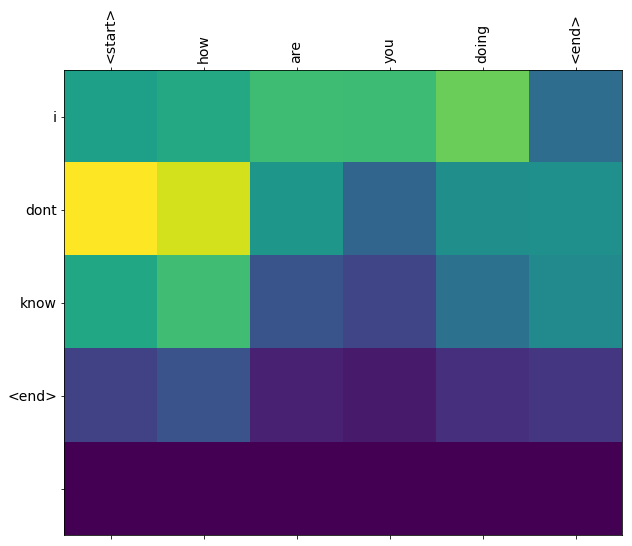

In [43]:
answer('How are you doing', encoder, decoder, dict_index, max_length_targ)

Input: <start> do you know anything <end>
Predicted translation: no <end> 


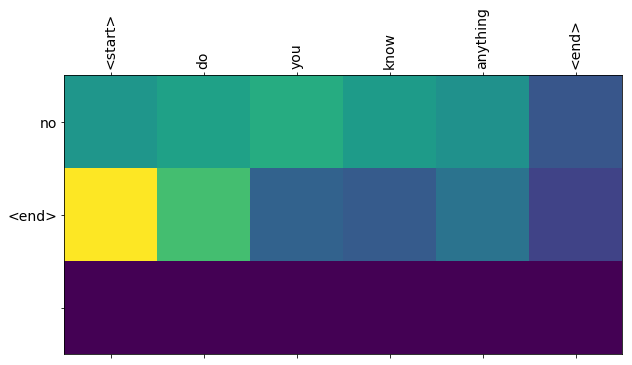

In [46]:
answer('Do you know anything', encoder, decoder, dict_index, max_length_targ)

## Scratchpad

In [0]:
max_length_inp, max_length_targ 

In [0]:
target_tensor_train[0], 1 - np.equal(target_tensor_train[0], 0)

In [0]:
input_tensor_train[0], target_tensor_train[0]

In [0]:
q_index = create_index([q for q, a in data])
q_word2idx = q_index[0]
len(q_word2idx)

In [0]:
[[q_word2idx[w] for w in qs.split(' ')] for qs, a in data]

In [0]:
data[:100]

In [0]:
create_index([a for a,b in data[:100]])